## 1.	Resumen estadístico

In [1]:
import pandas as pd

# Supongamos que 'data' es nuestro DataFrame
data = pd.DataFrame({
    'edad': [25, 32, 35, 19, 45, 33, 42, 20, 28, 30],
    'horas_semana': [10, 9, 12, 15, 9, 7, 8, 11, 12, 9],
    'peliculas_mes': [5, 6, 7, 10, 6, 5, 6, 9, 7, 6]
})

print(data.describe())


            edad  horas_semana  peliculas_mes
count  10.000000     10.000000      10.000000
mean   30.900000     10.200000       6.700000
std     8.491172      2.347576       1.636392
min    19.000000      7.000000       5.000000
25%    25.750000      9.000000       6.000000
50%    31.000000      9.500000       6.000000
75%    34.500000     11.750000       7.000000
max    45.000000     15.000000      10.000000


## 2.	Visualización de datos

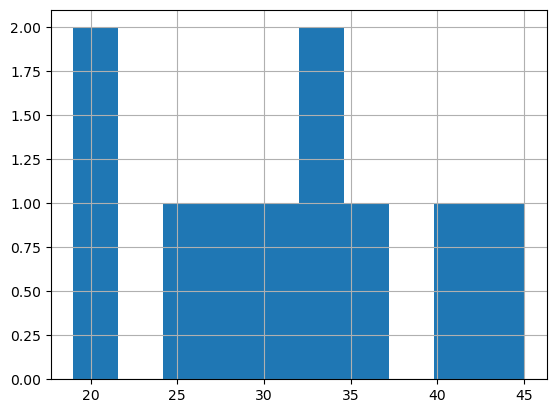

In [2]:
import matplotlib.pyplot as plt

data['edad'].hist(bins=10)
plt.show()


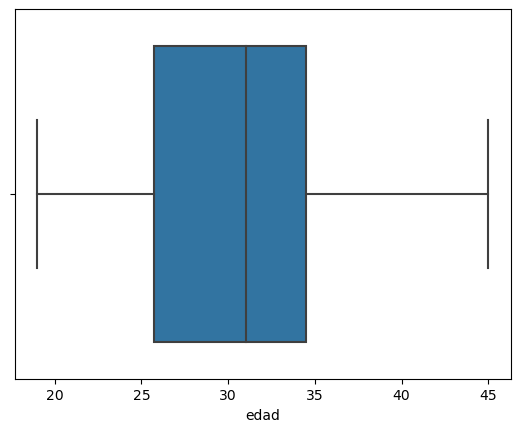

In [3]:
import seaborn as sns

sns.boxplot(x=data['edad'])
plt.show()


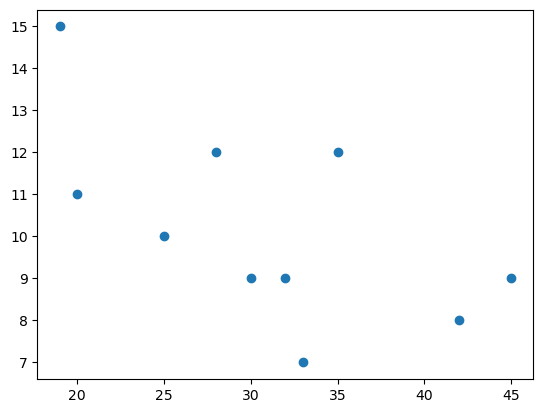

In [4]:
plt.scatter(data['edad'], data['horas_semana'])
plt.show()


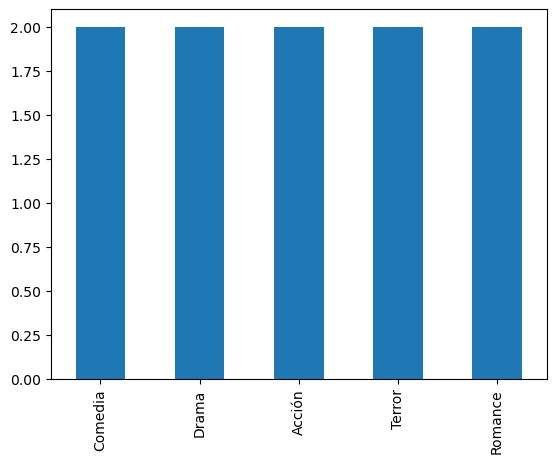

In [7]:
data['genero_preferido'] = ['Comedia', 'Drama', 'Acción', 'Terror', 'Comedia', 'Romance', 'Acción', 'Drama', 'Terror', 'Romance']

data['genero_preferido'].value_counts().plot(kind='bar')
plt.show()


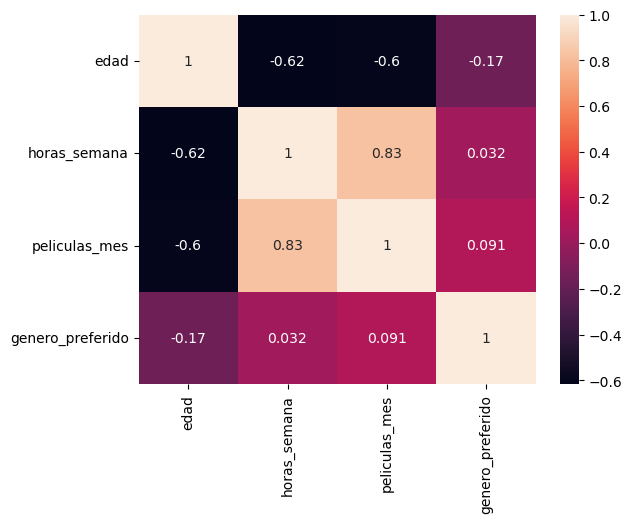

In [8]:
genre_mapping = {'Comedia': 0, 'Drama': 1, 'Acción': 2, 'Terror': 3, 'Romance': 4}  # Define the mapping for all genres

data['genero_preferido'] = data['genero_preferido'].map(genre_mapping)  # Convert the 'Genre' column to numeric representation

sns.heatmap(data.corr(), annot=True)
plt.show()

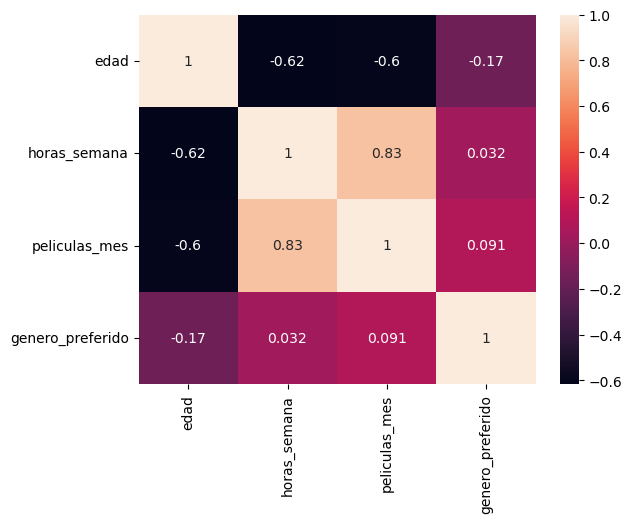

In [9]:

sns.heatmap(data.corr(), annot=True)
plt.show()


In [10]:
data

,edad,horas_semana,peliculas_mes,genero_preferido
0,25,10,5,0
1,32,9,6,1
2,35,12,7,2
3,19,15,10,3
4,45,9,6,0
5,33,7,5,4
6,42,8,6,2
7,20,11,9,1
8,28,12,7,3
9,30,9,6,4


## 3.	Análisis de variables categóricas

In [124]:
data['genero_preferido'].value_counts()

genero_preferido
0    2
1    2
2    2
3    2
4    2
Name: count, dtype: int64

<AxesSubplot:xlabel='genero_preferido'>

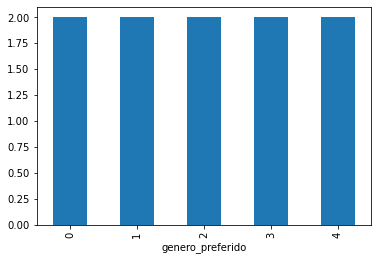

In [125]:
data['genero_preferido'].value_counts().plot(kind='bar')

<AxesSubplot:ylabel='count'>

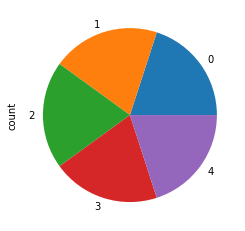

In [126]:
data['genero_preferido'].value_counts().plot(kind='pie')

In [127]:
data['ciudad'] = ['Madrid', 'Barcelona', 'Valencia', 'Sevilla', 'Zaragoza', 'Málaga', 'Murcia', 'Palma', 'Bilbao', 'Alicante']
pd.crosstab(data['genero_preferido'], data['ciudad'])


ciudad,Alicante,Barcelona,Bilbao,Madrid,Murcia,Málaga,Palma,Sevilla,Valencia,Zaragoza
genero_preferido,,,,,,,,,,
0,0,0,0,1,0,0,0,0,0,1
1,0,1,0,0,0,0,1,0,0,0
2,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,0,0,0,1,0,0
4,1,0,0,0,0,1,0,0,0,0


<AxesSubplot:xlabel='genero_preferido', ylabel='peliculas_mes'>

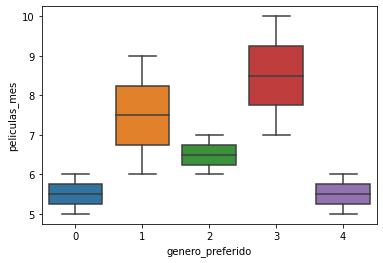

In [128]:
sns.boxplot(x=data['genero_preferido'], y=data['peliculas_mes'])

In [129]:
pd.get_dummies(data['genero_preferido']) # One-hot encoding

,0,1,2,3,4
0,True,False,False,False,False
1,False,True,False,False,False
2,False,False,True,False,False
3,False,False,False,True,False
4,True,False,False,False,False
5,False,False,False,False,True
6,False,False,True,False,False
7,False,True,False,False,False
8,False,False,False,True,False
9,False,False,False,False,True


## 4.	Identificación de valores atípicos

In [130]:
data.head()

,edad,horas_semana,peliculas_mes,genero_preferido,ciudad
0,25,10,5,0,Madrid
1,32,9,6,1,Barcelona
2,35,12,7,2,Valencia
3,19,15,10,3,Sevilla
4,45,9,6,0,Zaragoza


In [131]:
data.loc[len(data.index)] = [120, 8, 7, 'Acción', 'Barcelona'] 
data.loc[len(data.index)] = [-15, 8, 7, 'Acción', 'Madrid'] 

In [132]:
data.tail()

,edad,horas_semana,peliculas_mes,genero_preferido,ciudad
7,20,11,9,1,Palma
8,28,12,7,3,Bilbao
9,30,9,6,4,Alicante
10,120,8,7,Acción,Barcelona
11,-15,8,7,Acción,Madrid


In [133]:
# Calcular IQR
Q1 = data['edad'].quantile(0.25)
Q3 = data['edad'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para los valores atípicos
filtro = (data['edad'] >= Q1 - 1.5 * IQR) & (data['edad'] <= Q3 + 1.5 *IQR)

# Filtrar los valores que no son atípicos
data_filtrada = data.loc[filtro]

print("Datos originales:")
print(data)

print("\nDatos sin atípicos:")
print(data_filtrada)



Datos originales:
    edad  horas_semana  peliculas_mes genero_preferido     ciudad
0     25            10              5                0     Madrid
1     32             9              6                1  Barcelona
2     35            12              7                2   Valencia
3     19            15             10                3    Sevilla
4     45             9              6                0   Zaragoza
5     33             7              5                4     Málaga
6     42             8              6                2     Murcia
7     20            11              9                1      Palma
8     28            12              7                3     Bilbao
9     30             9              6                4   Alicante
10   120             8              7           Acción  Barcelona
11   -15             8              7           Acción     Madrid

Datos sin atípicos:
   edad  horas_semana  peliculas_mes genero_preferido     ciudad
0    25            10              5  

<AxesSubplot:xlabel='edad'>

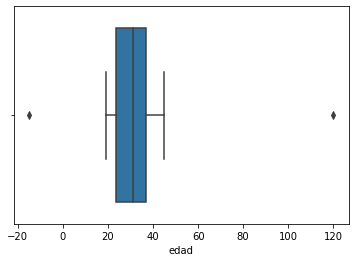

In [134]:
import seaborn as sns
sns.boxplot(x=data['edad'])


In [135]:
data.loc[len(data.index)] = [4000, 8, 7, 'Acción', 'Madrid'] 

In [136]:
from scipy import stats
import numpy as np
z_scores = np.abs(stats.zscore(data['edad']))
outliers = data[(z_scores > 3)]
print(z_scores)
outliers

0     0.297558
1     0.290935
2     0.288097
3     0.303234
4     0.278637
5     0.289989
6     0.281475
7     0.302288
8     0.294719
9     0.292827
10    0.207686
11    0.335398
12    3.462845
Name: edad, dtype: float64


,edad,horas_semana,peliculas_mes,genero_preferido,ciudad
12,4000,8,7,Acción,Madrid


## 5.	Verificación de la calidad de los datos

In [137]:
#introducimos valores repetidos
data.loc[len(data.index)] = [35, 7, 7, 'Terror', 'Soria'] 
data.loc[len(data.index)] = [35, 7, 7, 'Terror', 'Soria'] 

In [138]:
data.loc[len(data.index)] = [30, 5, 5, 'Drama', 'Soria'] 
data.loc[len(data.index)] = [30, 5, 5, 'Drama', 'Soria'] 

In [139]:

#introducimos valores faltantes
data.loc[len(data.index)] = [np.nan, 7, 7, 'Drama','Soria'] 
data.loc[len(data.index)] = [44, np.nan, 7, 'Drama', 'Soria'] 

In [140]:
# Comprobar el rango de valores
print("Valores de edad fuera de rango:", data['edad'].apply(lambda x: x < 0 or x > 120).any())

# Comprobar la unicidad
print("Ciudades duplicadas:", data['ciudad'].duplicated().any())

Valores de edad fuera de rango: True
Ciudades duplicadas: True


In [141]:
# Verificar duplicados
print("Número de filas duplicadas: ", data.duplicated().sum())
# Verificar datos faltantes
print("Número de valores faltantes: ", data.isnull().sum().sum())
# Resumen estadístico para verificar precisión y consistencia
data.describe()



Número de filas duplicadas:  2
Número de valores faltantes:  2


,edad,horas_semana,peliculas_mes
count,18.000000,18.000000,19.000000
mean,254.888889,8.722222,6.631579
std,934.992223,2.539235,1.300022
min,-15.000000,5.000000,5.000000
25%,28.500000,7.000000,6.000000
50%,32.500000,8.000000,7.000000
75%,40.250000,9.750000,7.000000
max,4000.000000,15.000000,10.000000


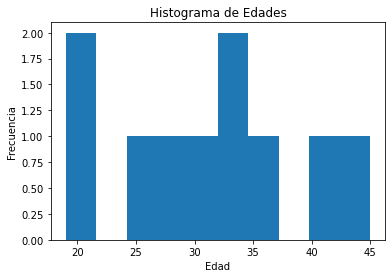

In [142]:
import seaborn as sns
plt.hist(data_filtrada['edad'])
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Histograma de Edades')
plt.show()


<AxesSubplot:xlabel='edad'>

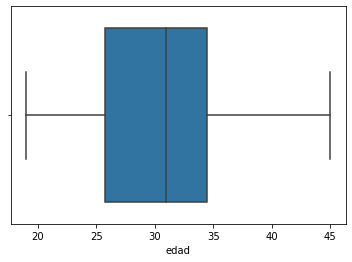

In [143]:

# Boxplot
sns.boxplot(x=data_filtrada['edad'])

## 6.	Correlación y análisis de independencia

In [144]:
data_filtrada


,edad,horas_semana,peliculas_mes,genero_preferido,ciudad
0,25,10,5,0,Madrid
1,32,9,6,1,Barcelona
2,35,12,7,2,Valencia
3,19,15,10,3,Sevilla
4,45,9,6,0,Zaragoza
5,33,7,5,4,Málaga
6,42,8,6,2,Murcia
7,20,11,9,1,Palma
8,28,12,7,3,Bilbao
9,30,9,6,4,Alicante


In [145]:
data_filtrada= data_filtrada.drop('ciudad', axis=1)

correlation_matrix = data_filtrada.corr()
print(correlation_matrix)


                      edad  horas_semana  peliculas_mes  genero_preferido
edad              1.000000     -0.617604      -0.602140         -0.166782
horas_semana     -0.617604      1.000000       0.827212          0.031750
peliculas_mes    -0.602140      0.827212       1.000000          0.091098
genero_preferido -0.166782      0.031750       0.091098          1.000000


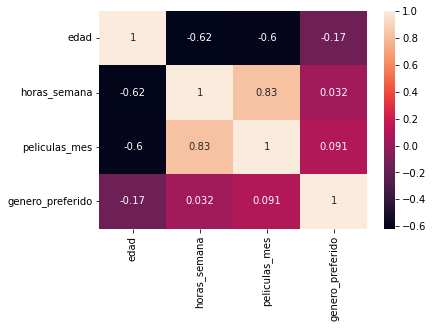

In [146]:
sns.heatmap(data_filtrada.corr(), annot=True)
plt.show()

In [148]:
from scipy.stats import chi2_contingency
df = data_filtrada
contingency_table = pd.crosstab(df['edad'], df['horas_semana'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
p

0.2673366001622652